# Database Hints:

1. You need to check the library or RDBMS to understand different; examples.
    -  Cursor.
    -  Parameterized Queries.
2. You need to commit DB (esp. for updates) and close connections.
3. The DBMS and the PL library interface usually have different data types and they may have implicit convertors or you need to develop sort of wrappers to handle them


# Functions are not classes or objects.

In [ ]:
# Object of list or any data type  -- Question how to input data in Assignment 5

class myClass:
    
    def __init__(self, L):
        self.myData=L
    
    def __str__(self):
        return ('myData '+ str(self.myData))
       
       
    def myMethodLen(self):
        return len(self.myData)

myObjectList = myClass([1,2,3])
print(myObjectList)
print(myObjectList.myMethodLen())


myObjectDict = myClass({'a':1,'b':2})
print(myObjectDict)
print(myObjectDict.myMethodLen())


myListofObjects=[]

while True:
    aString =input('Enter a string of integers seperated by commas or END if you want to stop').split(',')
    if ('END' in aString):
        break
    myString = [int(x) for x in aString]
    myListofObjects.append(myClass(myString))

for i in range(len(myListofObjects)):
    print(myListofObjects[i])
    print(myListofObjects[i].myMethodLen())
    print()
    


## [Graph database](https://en.wikipedia.org/wiki/Graph_database)

<b> In computing, a graph database (GDB) is a database that uses graph structures for semantic queries with nodes, edges, and properties to represent and store data. </b>


A graph database is a database that is based on graph theory. It consists of a set of objects, which can be a node or an edge.

1. Nodes represent entities or instances such as people, businesses, accounts, or any other item to be tracked. They are roughly the equivalent of a record, relation, or row in a relational database, or a document in a document-store database.
2. Edges, also termed graphs or relationships, are the lines that connect nodes to other nodes; representing the relationship between them. Meaningful patterns emerge when examining the connections and interconnections of nodes, properties and edges. The edges can either be directed or undirected. In an undirected graph, an edge connecting two nodes has a single meaning. In a directed graph, the edges connecting two different nodes have different meanings, depending on their direction. Edges are the key concept in graph databases, representing an abstraction that is not directly implemented in a relational model or a document-store model.
3. Properties are information associated to nodes. For example, if Wikipedia were one of the nodes, it might be tied to properties such as website, reference material, or words that starts with the letter w, depending on which aspects of Wikipedia are germane to a given database.


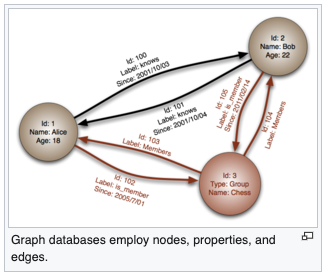


## [Differences of SQL vs NoSQL](https://www.xplenty.com/blog/the-sql-vs-nosql-difference/#:~:text=SQL%20databases%20are%20relational%2C%20NoSQL%20are%20non%2Drelational.&text=NoSQL%20databases%20have%20dynamic%20schemas,graph%20or%20wide%2Dcolumn%20stores.)

1. SQL databases are relational, NoSQL are non-relational.
2. SQL databases use structured query language and have a predefined schema. NoSQL databases have dynamic schemas for unstructured data.
3. SQL databases are vertically scalable, NoSQL databases are horizontally scalable.
4. SQL databases are table based, while NoSQL databases are document, key-value, graph or wide-column stores.
5. SQL databases are better for multi-row transactions, NoSQL are better for unstructured data like documents or JSON.

## [Neo4j and py2neo](https://medium.com/labcodes/graph-databases-talking-about-your-data-relationships-with-python-b438c689dc89)

## [Neo4j materials and download](https://neo4j.com/)

## [Py2neo v4 documantation](https://py2neo.org/v4/index.html)

## [toy-example](https://nicolewhite.github.io/neo4j-jupyter/hello-world.html)

## [Cypher query language](https://neo4j.com/developer/cypher/)

In [ ]:
# import py2neo

from py2neo import Graph,Node,Relationship

In [ ]:
#Database connection
graph = Graph("bolt://localhost:7687", name="toy-example", auth=("BMI6018", "123"))

In [ ]:
# Create a graph database withen a transaction

def createG():
    
    tx = graph.begin()
    nicole = Node("Person", name="Nicole", age=24)
    drew = Node("Person", name="Drew", age=20)
    
    mtdew = Node("Drink", name="Mountain Dew", calories=9000)
    cokezero = Node("Drink", name="Coke Zero", calories=0)
    
    coke = Node("Manufacturer", name="Coca Cola")
    pepsi = Node("Manufacturer", name="Pepsi")
    
    graph.create(nicole | drew | mtdew | cokezero | coke | pepsi)
    
    graph.create(Relationship(nicole, "LIKES", cokezero))
    graph.create(Relationship(nicole, "LIKES", mtdew))
    graph.create(Relationship(drew, "LIKES", mtdew))
    graph.create(Relationship(coke, "MAKES", cokezero))
    graph.create(Relationship(pepsi, "MAKES", mtdew))
    tx.commit()
createG()

In [ ]:
# Execute queries

def runQuery():
    

    
    input("query 1")
    data = graph.run("MATCH (n:Drink) RETURN n LIMIT 25")
    for d in data:
        print(d)

    
    input("query 2")
    query = """ MATCH (person:Person)-[:LIKES]->(drink:Drink)
    RETURN person.name AS name, drink.name AS drink"""  
    data = graph.run(query)
    
    for d in data:
        print(d)

runQuery()

In [ ]:
# Delete nodes and relationships -- You need to delete relationships before nodes 

def deleteOneNodeAllRelations():
    tx = graph.begin()
    graph.run("MATCH (n { name: 'Nicole' }) DETACH DELETE n")     # In SQL --> use cascade
    tx.commit()

deleteOneNodeAllRelations()



In [ ]:
# Delete nodes and relationships -- You need to delete relationships before nodes 

def deleteG():
    
    tx = graph.begin()
    graph.run(" match ()-[r]->() delete r")
    graph.run("MATCH (n) DELETE n")      
    tx.commit()

deleteG()